In [66]:
import tensorflow_probability as tfp
import tensorflow as tf
import networkit as nit 
import numpy as np
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import random
import math as m
pi = tf.constant(m.pi)

In [158]:
def loss_func():
    loss = 0
    for node in graph.iterNodes():
        walk = random_walk(node,3)
        for i in walk:
            p  = tf.transpose(matrix[int(node)])
            t = tf.tensordot(p,matrix[int(i)],1)
            loss -= tf.math.log(tf.math.abs(tf.math.sigmoid(t)))
            for n_i in P_dist():
                loss += tf.math.log(tf.math.abs(tf.tensordot(tf.transpose(matrix[node]), matrix[int(n_i)],0)))
    return loss

In [159]:
def random_walk(node, walk_len):
    lst = [node]
    for _ in range(walk_len):
        k=[i for i in graph.iterNeighbors(int(lst[-1]))]
        if k:
            lst.append(np.random.choice(np.asarray(k,dtype=np.float32)))
        else:
            break
    return lst

In [160]:
def P_dist():
    return np.random.choice(node_list, size = 7, replace = True, p = degree_dist)

In [161]:
def visualize(graph, nodelst = [], lst = []):
    ''' visiualizes the graph
    '''
    plt.clf() #clear the sreen
    matrix = nit.algebraic.adjacencyMatrix(graph, matrixType='sparse') #make adjancency matrix of graph to convert it to a graph object of networkx
    G2 = nx.from_scipy_sparse_matrix(matrix)# converts the graph
    if not lst: #this is for just viewing graph
        nx.draw(G2,with_labels=True)
    else: #this is for viewing graph with colors to see clusters
        colors = [random.uniform(0,0.1) for _ in range(0,len(lst))]
        color_lst = []
        for i in nodelst:
            for index, j in enumerate(lst):
                if i in j:
                    color_lst.append(colors[index])
        nx.draw(G2,nodelist = nodelst ,with_labels=True, node_color = color_lst)
    plt.axis('equal')

In [177]:
#graph = nit.generators.ClusteredRandomGraphGenerator(20,5,0.2,0.4).generate()
graph = nit.generators.ErdosRenyiGenerator(10, 0.3, directed = False, selfLoops = False).generate()

In [178]:
totalNodes = graph.numberOfNodes()
g = tf.random.Generator.from_seed(1234)
matrix = g.uniform(shape=(graph.numberOfNodes(),50), minval = 0.001)
node_list = tf.convert_to_tensor([i for i in graph.iterNodes()], dtype=tf.float32)
total_weight = sum(graph.degree(i) for i in graph.iterNodes())
degree_dist = np.asarray([graph.degree(i)/total_weight for i in node_list], dtype=np.float32)

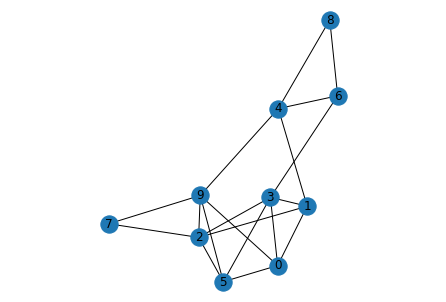

In [179]:
visualize(graph)

In [180]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
#print(matrix)
matrix = tf.Variable(matrix)
losses = opt.minimize(loss_func,[matrix])
# In TF2/eager mode, the optimization runs immediately.
#print("optimized value is {} with loss {}".format("h", loss_func()))
#print(matrix)


In [181]:
def similarity(y_true, y_pred):
    coss = tf.keras.losses.CosineSimilarity(axis=0)
    return coss(y_true,y_pred).numpy()

In [182]:
print(similarity(matrix[0],matrix[1]))

-0.08875821


In [183]:
for i in graph.iterNodes():
    print("{} - {} similarity: {}".format(0,i,similarity(matrix[0],matrix[i])))

0 - 0 similarity: -0.9999998807907104
0 - 1 similarity: -0.0887582078576088
0 - 2 similarity: -0.25992393493652344
0 - 3 similarity: -0.30179885029792786
0 - 4 similarity: -0.31315767765045166
0 - 5 similarity: -0.21336637437343597
0 - 6 similarity: -0.24371552467346191
0 - 7 similarity: -0.24360117316246033
0 - 8 similarity: -0.33695363998413086
0 - 9 similarity: -0.1622312366962433


In [189]:
%%html
$\sum_{v\in V}$